# Finding the Best Markets to Advertise In
## Introduction
E-learning (electronic learning) is a form of online education and training often used by academia, corporations, and individuals. The popularity of e-learning grew substantially after the COVID-19 pandemic created a high demand for remote learning solutions. E-learning has been shown to have multiple benefits over traditional learning such as lower costs, long distance capabilities, and flexabile scheduling.

The goal of this project is to help an e-learning company find the two best markets to advertise programming courses in so they can promote their product via advertisments. This company's courses focus on web and mobile development, but also range from data science to game development and more.

## Importing Libraries & Defining Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from tabulate import tabulate

def count_value_pct_rounded(series):
    '''Counting % of each unique value in a Series, rounded to the 1st decimal'''
    return round(series.value_counts(normalize=True)*100, 2)

def print_pretty_table(series, headers):
    '''Pretty-printing a Series as a table'''
    print(tabulate(series, headers=headers, tablefmt='orgtbl'), '\n'*2)
    
def print_money_per_month_mean_table(df):
    mpm_mean = df[['CountryLive', 'MoneyPerMonth']].groupby('CountryLive')\
                                                        .mean()\
                                                        .sort_values(by='MoneyPerMonth', ascending=False)

    print_pretty_table(round(mpm_mean,2), headers=['Country', 'Mean $'])

def print_money_per_month_median_table(df):
    mpm_median = df[['CountryLive', 'MoneyPerMonth']].groupby('CountryLive')\
                                                        .median()\
                                                        .sort_values(by='MoneyPerMonth', ascending=False)

    print_pretty_table(round(mpm_median,2), headers=['Country', 'Median $'])
    
def create_barh_plot(series, title, xlabel=None, yticklabels=None):
    '''Creating a horizontal bar plot for a Series'''
    fig, ax = plt.subplots(figsize=(8,3))
    series.plot.barh()
    ax.set_title(title, fontsize=20)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=15)
    if yticklabels:
        ax.tick_params(axis='both', labelsize=12, left=False)
        ax.set_yticklabels(yticklabels)
    for side in ['top', 'right', 'left']:
        ax.spines[side].set_visible(False)
    plt.show()
    
def create_freq_table(df, column):    
    '''Creating a frequency table (both absolute and relative frequencies) 
    for a column of a dataframe, with the possibility to assign the order of the values
    '''
    abs_freq = df[column].value_counts()
    rel_freq=count_value_pct_rounded(df[column])   
    freq_table = pd.DataFrame(data={'Absolute frequency': abs_freq, 
                                    'Relative frequency': rel_freq})
    return freq_table

def create_box_plot(df,
                    column,
                    title,
                    xlabel=''):
    '''Creating box plots by category for a column in a dataframe
    Implies the presence of the `MoneyPerMonth` column
    '''
    fig, ax = plt.subplots(figsize=(8,3))
    ax = sns.boxplot(x=column, y='MoneyPerMonth', 
                     data=df,
                     showmeans=True,
                     meanprops={'marker':'o',
                                'markerfacecolor':'lime', 
                                'markeredgecolor':'black',
                                'markersize':'8'}
                     )
    plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Money per month, $', fontsize=12)
    #ax.set_ylim(0,None)
    plt.show()

## Understanding the Data
We will search existing data to find the best choices for advertising, as it will be much less costly than, let's say, organizing surveys for different markets. A good choice will be data from [freeCodeCamp](https://www.freecodecamp.org/), a free e-learning platform with courses on web development and [a popular Medium publication](https://www.freecodecamp.org/news/) with over 400,000 followers. In 2017, they released [this survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969), which attracted new coders with varying interests (not only web development), which will be ideal for the purposes of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [2]:
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
fcc.shape

(18175, 136)

In [3]:
# Avoiding truncated output
pd.options.display.max_columns = 150
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

We can see we have a lot columns (136), let's begin by trying to understand what these columns mean and see if we can discard any of them.

In [4]:
print(fcc.columns.tolist())

['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo', 'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode', 'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income', 'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev', 'IsUnderEmployed', 'JobApplyWh

We may not have any clear documentation to explain each column, but we're lucky that most column names are self-explanatory and the `raw-data`  folder of the [repository](https://github.com/freeCodeCamp/2017-new-coder-survey) we mentioned above has the initial survery questions to help us infer what each column describes. In doing so, we find that most columns are not of use to our analysis. This is due to them:
* Lacking relevence (e.g. `CommuteTime`)
* Refering to the sources of student's previous learning resources (`Podcast...`, `CodeEvent...`, `Resource...`, `YouTube...`), which is of little use to us.

Let's only keep the columns whose content could be useful to our analysis. 

In [5]:
fcc = fcc[['Age', 'AttendedBootcamp', 'CountryCitizen', 'CountryLive', 
           'EmploymentField', 'EmploymentStatus', 'Gender', 'HasChildren', 
           'HasDebt', 'HasFinancialDependents', 'HasHomeMortgage', 
           'HasStudentDebt', 'HoursLearning', 'Income', 'JobRoleInterest',
           'MaritalStatus', 'MoneyForLearning', 'MonthsProgramming', 
           'SchoolDegree', 'SchoolMajor']]

Next, let's see if any of the remaining columns contain missing information.

In [6]:
round(fcc.isnull().sum()*100/len(fcc),2).sort_values(ascending=False)

HasChildren               78.77
HasHomeMortgage           64.80
HasStudentDebt            64.78
JobRoleInterest           61.53
Income                    58.06
EmploymentField           55.35
SchoolMajor               51.98
EmploymentStatus          21.07
HasDebt                   15.87
HasFinancialDependents    15.66
MaritalStatus             15.63
CountryLive               15.62
Age                       15.45
SchoolDegree              15.44
CountryCitizen            15.37
Gender                    14.97
MoneyForLearning           8.79
HoursLearning              8.04
MonthsProgramming          6.00
AttendedBootcamp           2.56
dtype: float64

It appears many columns have a very high number of missing values. Let's examine this more closely.

<Axes: >

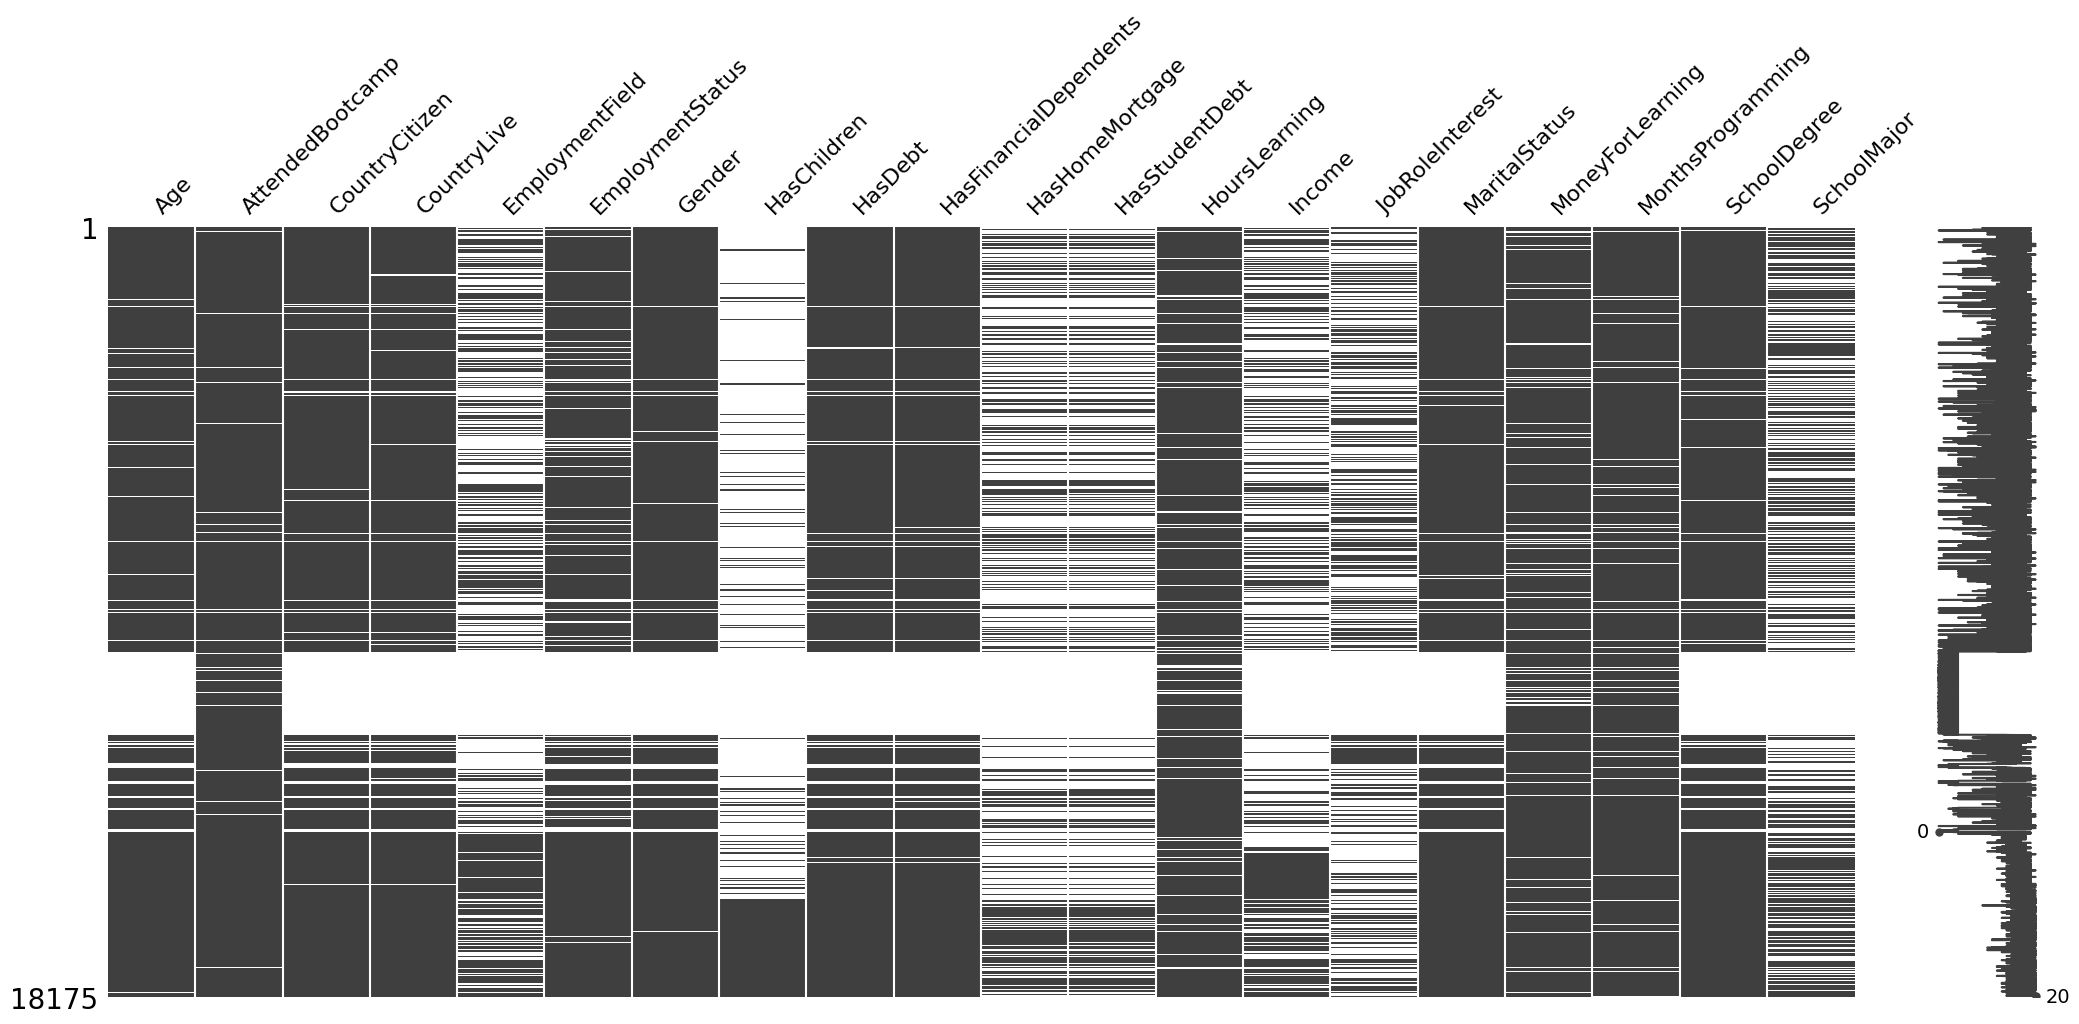

In [7]:
msno.matrix(fcc.iloc[:,:100])

The following columns contain a hight percentage of empty values (51% - 79%), likely due to being seen as sensative information.
 * `HasChildren`
 * `HasHomeMortgage`
 * `HasStudentDebt`
 * `JobRoleInterest`
 * `Income`
 * `EmploymentField`

At the same time, the `MoneyForLearning` column is rather full, hence we'll use it as a column with financial information instead of `Income`.

## Checking for Sample Representativity
For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach (web and mobile development, data science, game development, etc). We'd like to know:
* Where are these new coders located? 
* What are the locations with the greatest number of new coders?
* How much money new coders are willing to spend on learning?
* What is the most common age range of the new coders?

Before we can answer these questions, we need to figure out whether our current sample data is represenative of our population of interest and if it has the right categories of people for our purpose.

The `JobRoleInterest` column is a good place to start since it describes the job roles each respondent is interested in seeking.

In [8]:
round(fcc['JobRoleInterest'].value_counts(normalize=True)*100,2)

JobRoleInterest
Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.77
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.44
  Data Scientist                                                                                                                                                                                                                                                                             2.17
Back-End Web Developer                                                                                            

We can see that a decent number of people (~18%) are insterested in web development, especially full-stack and front-end, but there are many entries with multiple roles.

Let's get a better idea of how many people are interest in multiple positions.

| Interested   |     % |
|--------------+-------|
| Several jobs | 68.35 |
| One job      | 31.65 | 




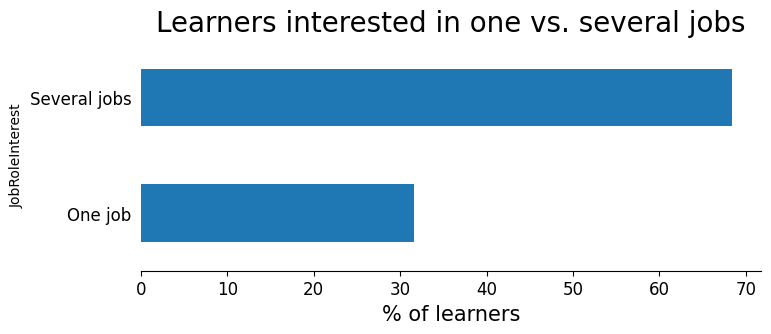

In [9]:
roles_without_nan = fcc['JobRoleInterest'].dropna()
roles_split = roles_without_nan.str.split(',')

# Separating into 2 groups
number_roles = roles_split.apply(lambda x: 'Several jobs' if len(x)>1 else 'One job')

# Counting and visualizing % of the respondents interested in one vs. several jobs
pct_number_roles = count_value_pct_rounded(number_roles)
print_pretty_table(pct_number_roles.to_frame(),
                   headers=['Interested', '%'])   
create_barh_plot(series=pct_number_roles.sort_index(), 
                 title='Learners interested in one vs. several jobs',
                 xlabel='% of learners',
                 yticklabels=['One job', 'Several jobs'])

The majority of learners (68%) have multiple job interests. This is good news for our e-learning company, which offers a wide range of courses, as some students may decide to take more than one.

Since the focus of the company is on web and mobile development, let's check the percentage of people interested in at least one of these topics.

| Web/Mobile   |     % |
| interested   |       |
|--------------+-------|
| True         | 86.24 |
| False        | 13.76 | 




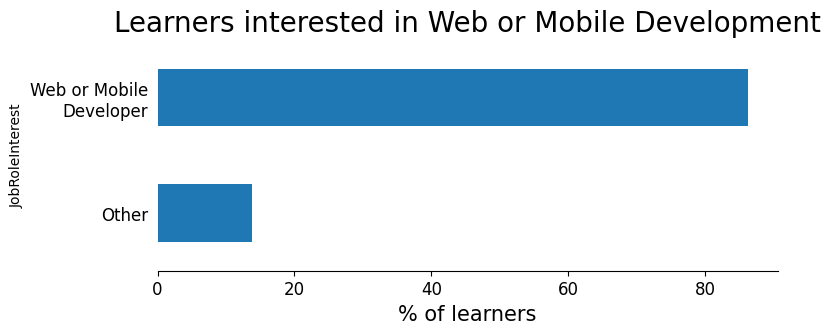

In [10]:
# Selecting the respondents interested in web or mobile developer roles
web_mob_dev = fcc['JobRoleInterest'].str.contains('Web Developer|Mobile Developer')

# Counting and visualizing % of the respondents interested in web or mobile developer roles
pct_web_mob_dev = count_value_pct_rounded(web_mob_dev)
print_pretty_table(pct_web_mob_dev.to_frame(),
                   headers=['Web/Mobile\ninterested', '%']) 
create_barh_plot(series=pct_web_mob_dev.sort_index(), 
                 title='Learners interested in Web or Mobile Development',
                 xlabel='% of learners',
                 yticklabels=['Other', 'Web or Mobile\nDeveloper'])

We can see that the large majority (86%) of learners are interested in either web or mobile development roles. 

This means **our sample data is represenative of our population of interest**, being people who are interested in the topics that our e-learning company offers in its courses (web development, mobile development, data science, game development, etc.)

Now that this has been confirmed, we can begin our analysis.

## Finding the Best Markets by Country
### New Coders - Locations and Densities
We can begin by searching for those locations with the greatest number of new coders since they represent the best market for potential new customers to advertise to.

The `CountryCitizen` and `CountryLive` columns in our dataset correspond to a respondant's location. The first one describes the respondant's country of origin, while the second describes the country they lived in at the time of the survey.

For our purposes, we will be working with `CountryLive`, as we want our ad campaigns to target the places where new potential customers currently live. Since we think of each country as its own market, we will be seeking the countries with the most potential new customers.

Let's find the top 10 markets and see if we can narrow our search from there.

|                          |   Absolute frequency |   Relative frequency |
|--------------------------+----------------------+----------------------|
| United States of America |                 3125 |                45.7  |
| India                    |                  528 |                 7.72 |
| United Kingdom           |                  315 |                 4.61 |
| Canada                   |                  260 |                 3.8  |
| Poland                   |                  131 |                 1.92 |
| Brazil                   |                  129 |                 1.89 |
| Germany                  |                  125 |                 1.83 |
| Australia                |                  112 |                 1.64 |
| Russia                   |                  102 |                 1.49 |
| Ukraine                  |                   89 |                 1.3  | 




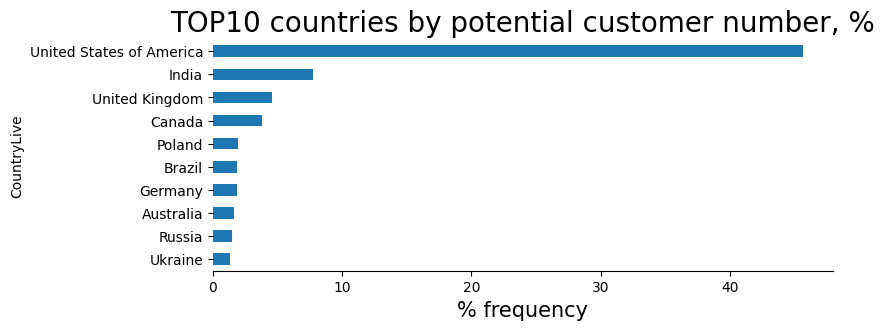

In [11]:
# Keeping only not-null values of the `JobRoleInterest` column
fcc = fcc[fcc['JobRoleInterest'].notnull()].copy()

# Creating a frequency table of potential customers by country    
freq_table_countries = create_freq_table(df=fcc, column='CountryLive')

# Pretty-printing the first 10 countries with their corresponding frequencies
print_pretty_table(freq_table_countries.iloc[:10,:], ['Absolute frequency', 'Relative frequency']) 

# Plotting TOP10 countries with their relative frequencies in %
top_10 = freq_table_countries['Relative frequency'].iloc[:10].sort_values()

create_barh_plot(series=top_10, 
                 title='TOP10 countries by potential customer number, %',
                 xlabel='% frequency')

We can make a couple of observations:
* **USA** stands out in first place at 46%.
* Second place is much closer with **India** at 8%, **UK** at 5%, and **Canada** at 4%.

### Spending Money for Learning

Next, let's figure out how much money per month new coders are spending on learning. We can use the `MonthsProgramming` column to tell how long a respondant had been coding at the time of a survey, and the `MoneyForLearning` column to tell how much money in American dollars they have spent learning. We can divide the money spent by the months coding to tell how much they have spent per month. We'll compare this to our e-learning company's monthly subscription service of $59 to tell if the respondant may be willing to subscribe.

**We will be limiting our analysis to the USA, India, UK, and Canada**, since the majority of respondants were located in these countires. It should also be noted that the courses our e-learning company offers are in English, and given that these countries have English as an official langauge will improve the odds of advertising to coders who could use our courses.

In [12]:
# Replacing 0 months (for the students who had just started learning programming) with 1 
# to avoid dividing by 0
fcc['MonthsProgramming'] = fcc['MonthsProgramming'].apply(lambda x: 1 if x==0 else x)

# Calculating the amount of money per month for each respondent
fcc['MoneyPerMonth'] = fcc['MoneyForLearning']/fcc['MonthsProgramming']

# Finding the % of missing values in the `MoneyPerMonth` column
print('% of missing values in the `MoneyPerMonth` column:',\
round(fcc['MoneyPerMonth'].isnull().sum()*100/len(fcc),2))

% of missing values in the `MoneyPerMonth` column: 9.65


Since rows missing values in the `MoneyPerMonth` and `CountryLive` columns will conflict with our analysis, we will drop these rows.

In [13]:
fcc = fcc.dropna(subset=['MoneyPerMonth', 'CountryLive'])

Now we will find the mean and median metrics for the money spent per month in USA, India, UK, and Canada.

In [14]:
top_4 = fcc[fcc['CountryLive'].isin(['United States of America', 'India',
                                        'United Kingdom', 'Canada'])]

print_money_per_month_mean_table(top_4)
print_money_per_month_median_table(top_4)

| Country                  |   Mean $ |
|--------------------------+----------|
| United States of America |   228    |
| India                    |   135.1  |
| Canada                   |   113.51 |
| United Kingdom           |    45.53 | 


| Country                  |   Median $ |
|--------------------------+------------|
| United States of America |       3.33 |
| Canada                   |       0    |
| India                    |       0    |
| United Kingdom           |       0    | 




We can make a few obersvations:
* USA's mean is the biggest standout at \$228 per month.
* UK's mean is relatively low (\$46 per month) compared to the other three.
* All four countires have very low medians, meaning half of respondants spent little to no money per money. This suggests the distribution is right skewed with some outliers affecting the mean.

Let's examine this more closely and see how many potential customers are willing to pay money vs. those who like to learn for free.

Overall number of potential clients:	  3915
Number of potential clients ready to pay: 2071 

| Country                  |   Absolute frequency |   Relative frequency |
|--------------------------+----------------------+----------------------|
| United States of America |                 1619 |                78.17 |
| India                    |                  201 |                 9.71 |
| United Kingdom           |                  137 |                 6.62 |
| Canada                   |                  114 |                 5.5  | 




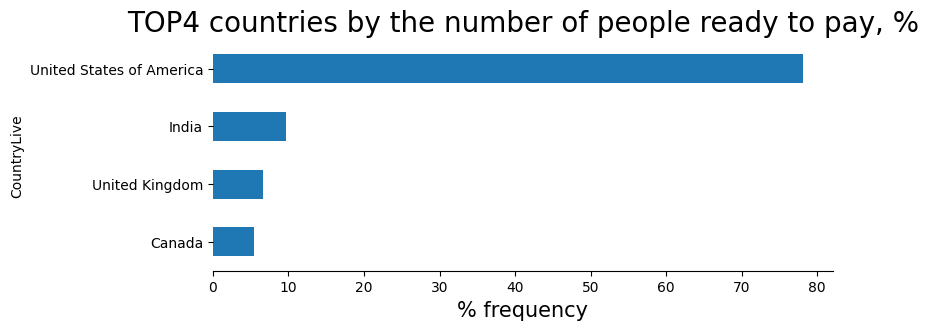

In [15]:
print('Overall number of potential clients:\t ', len(top_4))

# Considering only the respondents who paid for their learning
fcc_paid = top_4[top_4['MoneyPerMonth']>0.0].copy()

print('Number of potential clients ready to pay:', len(fcc_paid), '\n')

# Creating and printing frequency table of potential customers ready to pay   
ft_fcc_paid = create_freq_table(df=fcc_paid, column='CountryLive')
print_pretty_table(ft_fcc_paid, headers=['Country', 'Absolute frequency', 'Relative frequency'])

create_barh_plot(series=ft_fcc_paid['Relative frequency'].sort_values(), 
                 title='TOP4 countries by the number of people ready to pay, %',
                 xlabel='% frequency')

We see that the **majority of respondants who are willing to pay are in the USA** (78%) with slightly less than half of respondants wanting to learn for free.

### Dealing with Extreme Outliers
Let's test our hypothesis that the median is mean is being affected by outliers.

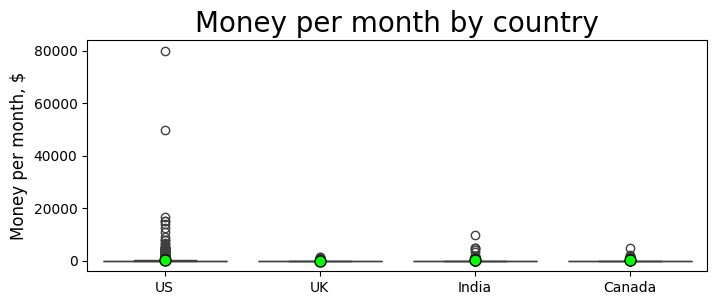

In [16]:
create_box_plot(df=top_4, column='CountryLive', title='Money per month by country')

This confirms that our theory of outliers as we can see that our box plots are very tight. This is most notable in the US that has two extreme outliers affecting the data. While spending $50,000+ on learning a month is not impossible, it's highly unlikely and could very well be an error by the respondant.

Let's remove any values over $20,000 and recalculate our mean.

| Country                  |   Mean $ |
|--------------------------+----------|
| United States of America |   183.8  |
| India                    |   135.1  |
| Canada                   |   113.51 |
| United Kingdom           |    45.53 | 




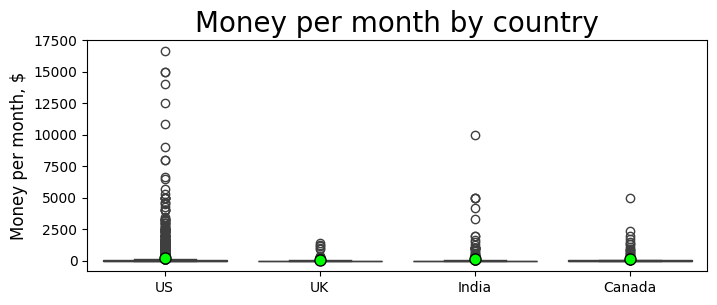

In [17]:
top_4 = top_4[top_4['MoneyPerMonth']<20000]

print_money_per_month_mean_table(top_4)
create_box_plot(df=top_4, column='CountryLive', title='Money per month by country')

The boxplots are still very tight with a lot of outliers. To get a better idea of if these outliers in the USA are valid instead of an error by the respondant, let's examine how participants in the USA who spent over $6000 per month answered other questions on the survey.

In [18]:
us_outliers = top_4[
    (top_4['CountryLive'] == 'United States of America') & 
    (top_4['MoneyPerMonth'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth
718,26.0,1.0,United States of America,United States of America,architecture or physical engineering,Employed for wages,male,NaN,0.0,0.0,NaN,NaN,35.0,44500.0,"User Experience Designer, Full-Stack Web Dev...","single, never married",8000.0,1.0,bachelor's degree,Architecture,8000.000000
1222,32.0,1.0,United States of America,United States of America,NaN,Not working and not looking for work,female,NaN,1.0,0.0,0.0,0.0,50.0,NaN,"Front-End Web Developer, Mobile Developer,...","single, never married",13000.0,2.0,bachelor's degree,Anthropology,6500.000000
3184,34.0,1.0,NaN,United States of America,software development and IT,Employed for wages,male,NaN,0.0,0.0,NaN,NaN,10.0,40000.0,"Quality Assurance Engineer, DevOps / SysAd...","single, never married",9000.0,1.0,"some college credit, no degree",NaN,9000.000000
3930,31.0,0.0,United States of America,United States of America,NaN,Not working and not looking for work,male,NaN,1.0,0.0,0.0,1.0,50.0,NaN,"DevOps / SysAdmin, Front-End Web Developer...",married or domestic partnership,65000.0,6.0,bachelor's degree,Biology,10833.333333
6805,46.0,1.0,United States of America,United States of America,NaN,Not working but looking for work,male,NaN,1.0,0.0,0.0,1.0,45.0,NaN,"Full-Stack Web Developer, Game Developer, Pr...",married or domestic partnership,15000.0,1.0,bachelor's degree,Business Administration and Management,15000.000000
7198,32.0,0.0,United States of America,United States of America,education,Employed for wages,male,NaN,1.0,0.0,0.0,1.0,4.0,NaN,"Full-Stack Web Developer, Back-End Web Developer","single, never married",70000.0,5.0,"professional degree (MBA, MD, JD, etc.)",Computer Science,14000.000000
7505,26.0,1.0,United States of America,United States of America,NaN,Not working but looking for work,male,NaN,1.0,0.0,0.0,1.0,40.0,NaN,"Mobile Developer, Full-Stack Web Developer, ...","single, never married",20000.0,3.0,bachelor's degree,Economics,6666.666667
9778,33.0,1.0,United States of America,United States of America,education,Employed for wages,male,NaN,1.0,0.0,0.0,1.0,40.0,20000.0,"Full-Stack Web Developer, Data Engineer, Qua...","single, never married",8000.0,1.0,master's degree (non-professional),Chemical Engineering,8000.000000
16650,29.0,0.0,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,1.0,1.0,1.0,1.0,40.0,NaN,"Product Manager, Data Engineer, Full-Stack W...",married or domestic partnership,200000.0,12.0,associate's degree,Computer Programming,16666.666667
16997,27.0,0.0,United States of America,United States of America,health care,Employed for wages,female,1.0,1.0,1.0,0.0,1.0,12.0,40000.0,"Mobile Developer, Game Developer, User Exp...","single, never married",12500.0,1.0,"some college credit, no degree",NaN,12500.000000


Our results show only 6 out of these 11 extreme outliers attended bootcamps. Given that it's unlikely they spent that much money on learning, it's likely that these were user errors, possibly due to misunderstanding the question and thinking university tuition was included.

It should also be noted that the 6 who have attended bootcamps have only been coding for a short period (<=3 months), so it's likely they spend a large sum upfront for a bootcamp which has inflated their monthly spending.

Therefore, we will exclude all 11 of these extreme outliers from our data.

In [19]:
top_4 = top_4.drop(us_outliers.index)

Let's next look at the outliers in India, where there are values over $2500 a month. This could be valid, as the respondants may have signed up for multiple bootcamps, but let's make sure by examining how they answered other questions on the survey.

In [20]:
india_outliers = top_4[(top_4['CountryLive']=='India')&(top_4['MoneyPerMonth']>=2500)]
india_outliers

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth
1728,24.0,0.0,India,India,NaN,A stay-at-home parent or homemaker,male,NaN,0.0,0.0,NaN,NaN,30.0,NaN,"User Experience Designer, Mobile Developer...","single, never married",20000.0,4.0,bachelor's degree,Computer Programming,5000.000000
1755,20.0,0.0,India,India,NaN,Not working and not looking for work,male,NaN,0.0,0.0,NaN,NaN,10.0,NaN,"Information Security, Full-Stack Web Developer...","single, never married",50000.0,15.0,bachelor's degree,Computer Science,3333.333333
7989,28.0,0.0,India,India,software development and IT,Employed for wages,male,0.0,1.0,1.0,0.0,1.0,20.0,300000.0,"User Experience Designer, Back-End Web Devel...",married or domestic partnership,5000.0,1.0,bachelor's degree,Aerospace and Aeronautical Engineering,5000.000000
8126,22.0,0.0,India,India,NaN,Not working but looking for work,male,NaN,1.0,0.0,0.0,1.0,80.0,NaN,"Back-End Web Developer, Full-Stack Web Develop...","single, never married",5000.0,1.0,bachelor's degree,Electrical and Electronics Engineering,5000.000000
13398,19.0,0.0,India,India,NaN,Unable to work,male,NaN,0.0,0.0,NaN,NaN,30.0,NaN,Mobile Developer,"single, never married",20000.0,2.0,bachelor's degree,Computer Science,10000.000000
15587,27.0,0.0,India,India,software development and IT,Employed for wages,male,0.0,1.0,1.0,0.0,1.0,36.0,60000.0,"Full-Stack Web Developer, Data Scientist","single, never married",100000.0,24.0,bachelor's degree,Communications,4166.666667


Our results show that none of these 6 respondants attended any bootcamps. Given these are likely user errors, let's remove these outliers.

In [21]:
top_4 = top_4.drop(india_outliers.index) # using the row labels

Now let's check out the extreme outlier we see for Canada where a person spent more than $5000 per month.

In [22]:
canada_outlier = top_4[(top_4['CountryLive']=='Canada')&(top_4['MoneyPerMonth']>=5000)]
canada_outlier

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth
13659,24.0,1.0,Canada,Canada,finance,Employed for wages,male,NaN,1.0,0.0,1.0,0.0,10.0,140000.0,"Mobile Developer, Full-Stack Web Developer, ...","single, never married",10000.0,2.0,bachelor's degree,Finance,5000.0


Similar to what we saw in the USA, these extreme outlier has only been coding a short time (2 months) and likely paid for an expensive bootcamp upfront. So, let's remove this outlier as well.

In [23]:
top_4 = top_4.drop(canada_outlier.index)

Now that we've removed the extreme outliers from the USA, India, and Canada, let's once again calculate and plot our means.

| Country                  |   Mean $ |
|--------------------------+----------|
| United States of America |   142.65 |
| Canada                   |    93.07 |
| India                    |    65.76 |
| United Kingdom           |    45.53 | 




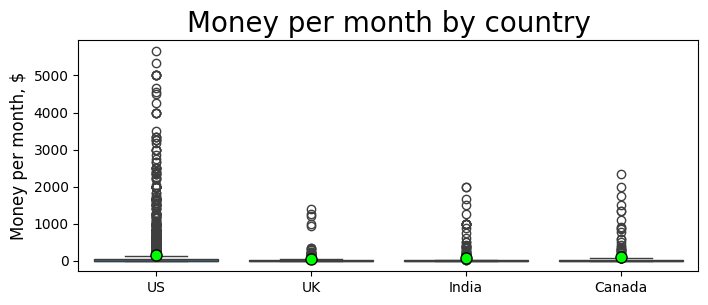

In [24]:
print_money_per_month_mean_table(top_4)
create_box_plot(df=top_4, column='CountryLive', title='Money per month by country')

We can still see the box plots are very tight and there are quite a lot of outliers, though less extreme now. The mean values have lowered, though they still remain heavily influenced by the outliers.

We can see **the USA is the clear best market**, but the other markets are still worth looking into.

### Choosing the Second Best Market
A good place to start when choosing the second best market will be to ensure the average respondant has a monthly spending tendency that reaches the $59 price tag for our e-learning company's subscription service.

Let's check this by evaluate the means again.

In [25]:
print_money_per_month_mean_table(top_4)

| Country                  |   Mean $ |
|--------------------------+----------|
| United States of America |   142.65 |
| Canada                   |    93.07 |
| India                    |    65.76 |
| United Kingdom           |    45.53 | 




We can see that Canada and India meet our $59 criteria, while the UK does not. 

This means either Canada or India will be our second best market. Since respondants in Canada tend to spend roughly $27 more a month on learning than those in India, it makes sense that they make be likely to subscribe to our e-learning service. However, our goal is reach the most potential customers possible, so if India were to have many more potential customers, then they would be the more suitable choice.

Let's see if this possibility is true by comparing the frequencies of potential customers.

In [26]:
# Removing the UK
top_3 = top_4[top_4['CountryLive'] != 'United Kingdom']

# Creating and printing frequency table of potential customers ready to pay   
ft_top_3 = create_freq_table(df=top_3, column='CountryLive')
print_pretty_table(ft_top_3, headers=['Country', 'Absolute frequency', 'Relative frequency'])

| Country                  |   Absolute frequency |   Relative frequency |
|--------------------------+----------------------+----------------------|
| United States of America |                 2920 |                80.75 |
| India                    |                  457 |                12.64 |
| Canada                   |                  239 |                 6.61 | 




We can see there are nearly twice as many potential customers in India compared to Canada. This seems a sufficient number to outweight the roughly $27 more a month spent by learners in Canada.

Therefore, we conclude that **India is the second best market**.

### Dividing the Budget
We've figured out our three best markets: USA, India, and Canada. Now the question is how to divide the market budget between them. There are a couple of good choices:
* Advertise soley in the USA, as it's the clear leader in the number of potential customers and paying capacity.
* Split the budget between the USA, India, and Canada based on the frequency of potential customers: 81% for the USA, 13% for India, and 6% for Canada.

It may also be worth while to send out extra surveys to the USA, India, and Canada to get a better understanding of these three markets before advertising.

## Conclusion

In this project, we analyzed survey data from new coders to find the three best markets to advertise in: 
1. USA
2. India
3. Canada.

We found that the USA was by far the best market, both in the massive number of potential customers and each coders spending capacity, but the choice for the second best was much more close. We ultimately decided India was the second best market, as it had almost twice as many potential customers than Canada, although Canada did have a larger spending capacity.